## Generate random variables

a) Generate 1000 independent samples from Normal distribution with mean $\mu = 0$ and variance $\sigma^2 = 1$. Plot and visualize the data.

(Hint: Generate Gaussian samples from uniform random variables.)


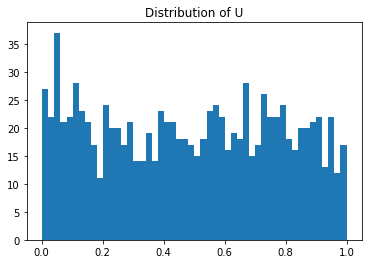

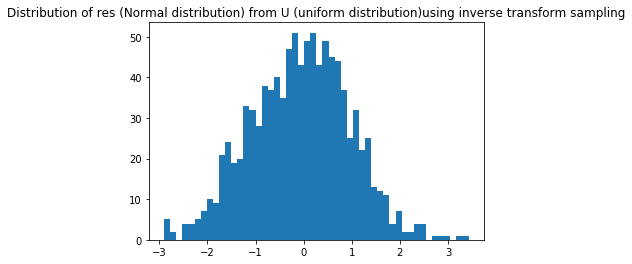

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# uniform samples
u = np.random.rand(1000)
# resultant gaussian distribution
# taking the inverse of cumulative distribution of gaussian
res = norm.ppf(u)

# ploting
plt.figure()
plt.hist(u,bins = 50)
plt.title("Distribution of U")
plt.show()
plt.figure()
plt.hist(res, bins = 50)
plt.title("Distribution of res (Normal distribution) from U (uniform distribution)using inverse transform sampling")
plt.show()

### Generate correlated random variables

b) Generate 1000 independent samples from Bivariate Normal distribution with means $\mu_{X} = \mu_{Y} = 0$, variances $\sigma_{X}^2 = \sigma_{Y}^2 = 1$ and correlation coefficient $\rho = - 0.9$. Plot and visualize the data in 2D and 3D.

(Hint: If (X,Y) is Bivariate Normal with $\mu_X = \mu_Y = 0$, $\sigma_X^2 = \sigma^2_Y = 1$ and correlation coefficient $\rho$, then the conditional distribution of $Y$ (conditioned on $X = x$) is Normal with mean $\rho x$ and variance $1 - \rho^2$, i.e., $Y|_{X = x} \sim {\mathcal N}(\rho x, 1 - \rho^2)$.)


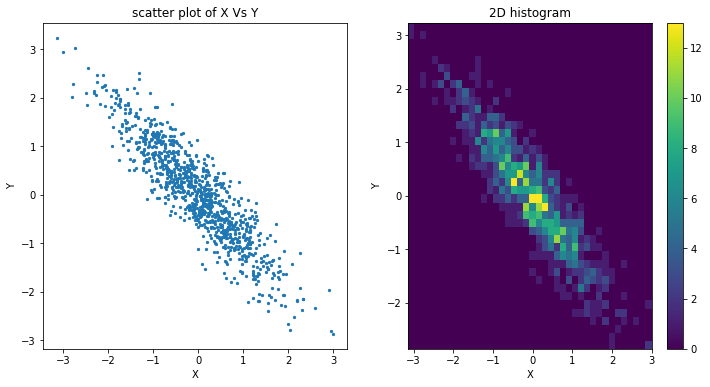

correlation coefficient : -0.9023774773829889


In [4]:
X = np.random.randn(1000)
Y = np.zeros(1000)
rho = -0.9
for i in range(1000):
    Y[i] = rho*X[i] + np.sqrt(1-rho**2)*np.random.randn(1)

# 2D plot
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X,Y, s = 5)
plt.title("scatter plot of X Vs Y")
plt.xlabel("X")
plt.ylabel("Y")

# 2d histogram
plt.subplot(1,2,2)
plt.hist2d(X,Y,bins = 40)
plt.title("2D histogram")
plt.colorbar()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# correlation coefficient
print("correlation coefficient :",np.corrcoef(X,Y)[1,0])

## Estimate correlation coefficient

The file 'data_corr.csv' has 1000 independent samples from a Bivariate Normal distribution with means $\mu_X = \mu_Y = 0$, variances $\sigma_X^2 = \sigma_Y^2 = 1$ and unknown correlation coefficient $\rho$.

c) Load the data from the file 'data_corr.npz'. Plot and visualize the marginal and joint distributions of $X$ and $Y$.

d) Comment on the nature of correlation observed in the data.

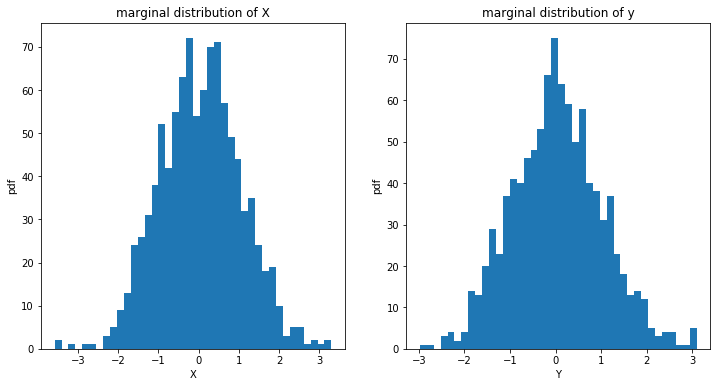

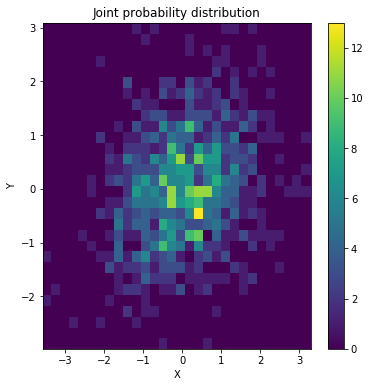

Correlation matrix :
[[1.         0.22812516]
 [0.22812516 1.        ]]

The correlation is: 0.22812516367855662


In [9]:
import pandas as pd
# loading data
data = pd.read_csv("data_corr.csv")
X = np.array(data.X)
Y = np.array(data['Y '])

# plotting
plt.figure(figsize=(12,6))
# marginal distribution of X
plt.subplot(1,2,1)
plt.hist(X, bins = 40)
plt.title("marginal distribution of X")
plt.xlabel("X")
plt.ylabel("pdf")

# marginal distribution of Y
plt.subplot(1,2,2)
plt.hist(Y, bins = 40)
plt.title("marginal distribution of y")
plt.xlabel("Y")
plt.ylabel("pdf")

# joint distribution
plt.figure(figsize=(6,6))
plt.hist2d(X,Y,bins = 30)
plt.colorbar()
plt.title("Joint probability distribution")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

# observations
print("Correlation matrix :")
correlation = np.corrcoef(X,Y)
print(correlation)
print()
print("The correlation is: {}".format(correlation[0,1]))

# Observation

- From the joint pdf plot, we observe that there is positive correlation between X and Y.

### Maximum Likelihood Estimate using Grid Search

e) Let ${\mathsf P}_{\rho}(\mathbf{X} = \mathbf{x}, \mathbf{Y} = \mathbf{y})$ denote the likelihood function (for the observation $(\mathbf{x}, \mathbf{y})$, as a function of the parameter $\rho$). Compute the likelihood function for the given data and find the maximum likelihood estimate of $\rho$, $\hat{\rho}_{ML}$, using grid search.

(Hint: Plot ${\mathsf P}_{\rho}(\cdot,\cdot)$ as a function of $\rho$.)

In [10]:
X_square = sum(X**2)
Y_square = sum(Y**2)
XY = sum(X*Y)
maxi = -1e10
rho_Ml = -1
rho_arr = np.arange(-0.9,1,0.001)
for rho in range(len(rho_arr)):
    val = -1/(2*(1-rho_arr[rho]**2))*(X_square+Y_square-2*rho_arr[rho]*XY)- 1000*0.5*np.log(1-rho_arr[rho]**2)
    if(val > maxi):
        maxi = val
        rho_Ml = rho_arr[rho]

print("The Maximum Likelihood Estimate using Grid Search : ",rho_Ml)


The Maximum Likelihood Estimate using Grid Search :  0.22900000000000087


### Maximum Likelihood Estimate using Gradient Descent

f) Find the maximum likelihood estimate of $\rho$, $\hat{\rho}_{ML}$, using gradient descent. Plot the estimate of $\rho$ (versus iteration) for different choices of step size (e.g., 0.001, 0.01, 0.1).

rho_ML for step size 1e-06 : 0.22843963113457444
rho_ML for step size 0.0001 : 0.22929899195487446
rho_ML for step size 0.001 : nan
rho_ML for step size 0.01 : nan
rho_ML for step size 0.1 :

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


 nan


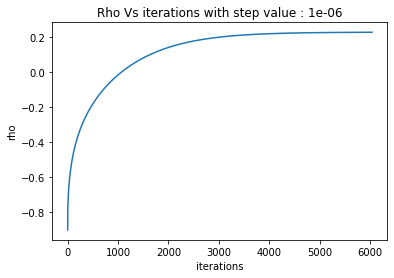

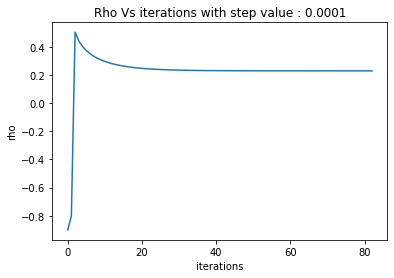

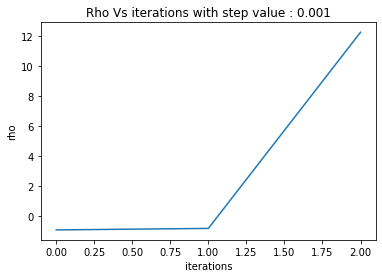

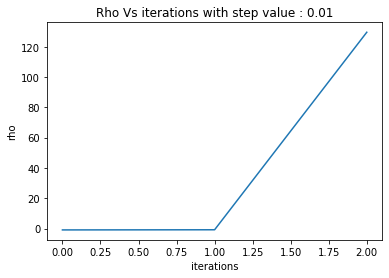

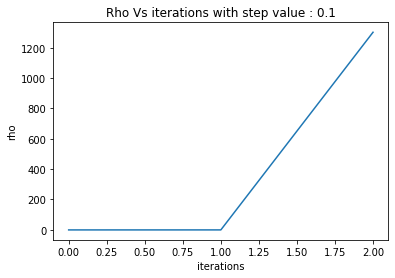

In [42]:
# importing libraries
import numpy as np
from numpy import random, sqrt, log, cos, sin, pi
import matplotlib.pyplot as plt
from scipy.misc import derivative

n = 1000 # size of X and Y
X_square = sum(X**2)
Y_square = sum(Y**2)
XY = sum(X*Y)
# Log likelihood function
LL = lambda rho : -1/(2*(1-rho**2))*(X_square+Y_square-2*rho*XY)- n*0.5*np.log(1-rho**2)


step_values = [1e-6,1e-4,1e-3,1e-2,1e-1]
for alpha in step_values:
    # initial value 
    rho_old = -0.9
    # implementation
    rho_mod = -0.8
    iterate = 0
    # storing values for ploting
    rho_val = [rho_old,rho_mod]
    while(abs(rho_mod-rho_old) > 1e-6):
        rho_old = rho_mod
        rho_mod = rho_old + alpha*derivative(LL,rho_old, dx =1e-6 )
        rho_val.append(rho_mod)
    
    # plotting
    plt.figure()
    iterations = np.arange(len(rho_val))
    plt.plot(iterations,rho_val)
    plt.title("Rho Vs iterations with step value : "+str(alpha))
    plt.xlabel("iterations")
    plt.ylabel("rho")
    print("rho_ML for step size "+str(alpha)+" :",rho_mod)

### Maximum Likelihood Estimate (Analysis)

g) Find the maximum likelihood estimate of $\rho, \hat{\rho}_{ML}$ analytically (from the likelihood function).

In [44]:
# solving for the roots of the first derivative of likelihood function gives the optimum value of rho
coef_val1 = sum(X*Y)/n
coef_val2 = (sum(X**2) + sum(Y**2))/n
# coefficients of the polynomial after performing the first derivative on the LL
coef_arr = np.array([1, -coef_val1, (coef_val2-1), -coef_val1])

# finding the zeroes of the first derivative
rho_arr = np.roots(coef_arr)
print('The possible values of ro are:\n{} \n'.format(rho_arr))

## we observe two of the three roots are imaginary and hence the possible root is the real root
print("The MLE estimate of rho obtained using analytical method is :\n {}\n".format(abs(rho_arr[2])))

# checking the second derivative
sec_pol = (3 * (rho**2)) - ((2*coef_val1)*rho) + (coef_val2 - 1)
sec_coef = np.array([3, -2*coef_val1, (coef_val2 - 1)])
sec_eval = np.polyval(sec_coef, rho_arr)

print("The second derivative values at the obtained first derivative roots are:\n {} \n".format(sec_eval))


The possible values of ro are:
[9.72001404e-05+1.00042382j 9.72001404e-05-1.00042382j
 2.29291505e-01+0.j        ] 

The MLE estimate of rho obtained using analytical method is :
 0.22929150491755682

The second derivative values at the obtained first derivative roots are:
 [-2.00169564-0.45858288j -2.00169564+0.45858288j  1.05337785+0.j        ] 



### Simple Linear Regression

h) Using linear regression, seek a relation between $Y$ and $X$ (i.e., express $Y$ as a linear function of $X$). Comment.

Estimated Regression Coefficients are: (0.22209297029587458, 0.02388922099139093)


Text(0, 0.5, 'Y')

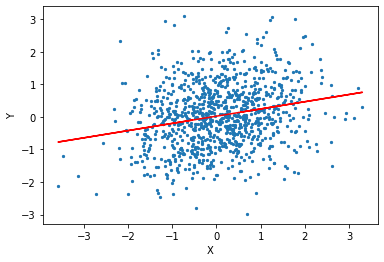

In [47]:
# simple linear regression
import numpy as np
import matplotlib.pyplot as plt
n = np.size(X)
Sxy = np.sum(X*Y) - (n*np.mean(X)*np.mean(Y))
Sxx = np.sum(X**2) - (n*(np.mean(X)**2))

# regression coefficients
alpha = Sxy/Sxx
beta = np.mean(Y) - (alpha*np.mean(X))
print("Estimated Regression Coefficients are: {}".format((alpha, beta)))

# prediction with the estimated linear relation 
y_pred = (alpha*X) + beta

# plotting the data and the regression line
plt.scatter(X,Y, s = 5)
plt.plot(X, y_pred,color = "r")
plt.xlabel('X')
plt.ylabel('Y')

# Observation
- linear regression is not able to fit the data well.

## Polynomial Regression

Load the two dimensional data from the file 'data_poly1.npz'.

i) Plot the data and comment on the relation between $X$ and $Y$ (plot $Y$ as a function of $X$).

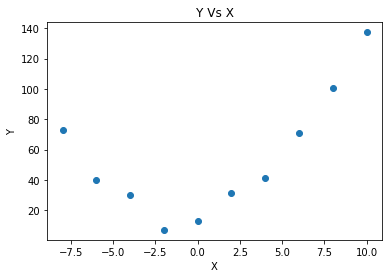

In [52]:
import numpy as np
data = np.load('data_poly1.npz')
X = data['x'].reshape(-1,1)
Y = data['y'].reshape(-1,1)
# plotting
plt.figure()
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Y Vs X")
plt.show()

# Observations
- the graph looks like a parabola.

### Polynomial Regression using Scikit-learn Libraries

Fit a polynomial model (for the suggested degree) to the data. Comment on the fit (as a function of the model) in terms of the mean square error.

(Hint: Use in-built libraries from Scikit-learn for the exercise.)

### Degree 1 (Linear)

j) Using linear regression, seek a relation between $Y$ and $X$. Plot the function and report the mean square error.

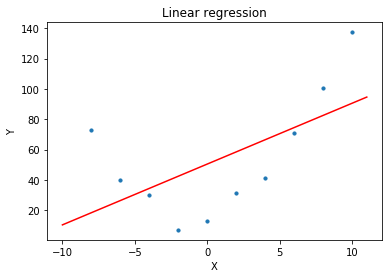

The mean squared error is : 977.1734445909718


In [62]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse

# fitting a linear regression model
lr = LR()
fit = lr.fit(X,Y)

# plot
plt.figure()
plt.scatter(X,Y, s = 10)
X1 = np.arange(-10,12).reshape(-1,1)
plt.plot(X1, lr.predict(X1),color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Linear regression")
plt.show()

print("The mean squared error is : {}". format(mse(Y,lr.predict(X))))

### Degree 2 (Quadratic)

k) Using polynomial regression of degree 2, seek a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

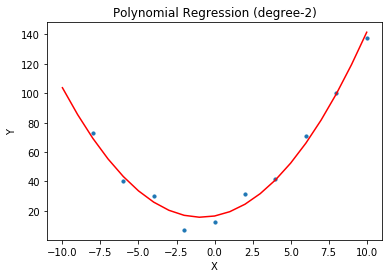

The mean squared error is: 24.846331727808156


In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# creating new features and training the model
pol = PolynomialFeatures(degree = 2)
X_new = pol.fit_transform(X)
lr2 = LinearRegression()
fit2 = lr2.fit(X_new, Y)

# visualizing the fit
X3 = np.arange(-10,11,1).reshape(-1,1)

plt.scatter(X, Y, s=10) 
plt.plot(X3, lr2.predict(pol.fit_transform(X3)), color = 'red') 
plt.title('Polynomial Regression (degree-2)') 
plt.xlabel('X') 
plt.ylabel('Y')  
plt.show() 
# Reporting the MSE
print("The mean squared error is: {}". format(mean_squared_error(Y, lr2.predict(X_new))))

### Degree 9

l) Using polynomial regression of degree 9, seek a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

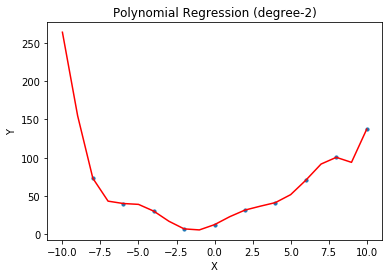

The mean squared error is: 2.9836029474310285e-13


In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# creating new features and training the model
pol = PolynomialFeatures(degree = 9)
X_new = pol.fit_transform(X)
lr9 = LinearRegression()
fit9 = lr9.fit(X_new, Y)

# visualizing the fit
X3 = np.arange(-10,11,1).reshape(-1,1)

plt.scatter(X, Y, s=10) 
plt.plot(X3, lr9.predict(pol.fit_transform(X3)), color = 'red') 
plt.title('Polynomial Regression (degree-9)') 
plt.xlabel('X') 
plt.ylabel('Y')  
plt.show() 
# Reporting the MSE
print("The mean squared error is: {}". format(mean_squared_error(Y, lr9.predict(X_new))))

### Training Error

m) Plot the mean square error versus the degree of the polynomial fit (for degree = 0,1, ..., 9). Comment on the best model for the data.

The MSE values are: 
 [1.50798216e+03 9.77173445e+02 2.48463317e+01 1.62649223e+01
 1.60313637e+01 1.53562079e+01 1.52222269e+01 9.47795624e+00
 4.89861633e-01 2.98360295e-13]


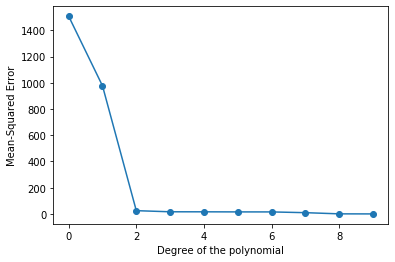

In [66]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

deg = np.arange(0,10,1)
mse_train = []
for i in range(len(deg)):
    pol_1 = PolynomialFeatures(degree = deg[i])
    X_new_1 = pol_1.fit_transform(X)
    lr3 = LinearRegression()
    fit3 = lr3.fit(X_new_1, Y)
    mse_train.append(mean_squared_error(Y, lr3.predict(X_new_1)))
    
mse_train = np.array(mse_train)
print("The MSE values are: \n", mse_train)
plt.figure()
plt.plot(deg, mse_train, marker = 'o')
plt.xlabel('Degree of the polynomial')
plt.ylabel('Mean-Squared Error')
plt.show()

# Observations
- If we fit a lower degree polynomial , under fitting is occuring.
- If we fit a higher degree polynomial , over fitting happens.

### Test error

Load 'data_poly2.npz'. The data points in the file are from the same sample as 'data_poly1.npz'.

n) Plot the mean square error (for degrees 0,1,...,9) for the test data set, for the polynomial fit obtained with the training data set 'data_poly1.npz'. Now, comment on the best model for data.

(Hint: Plot Training error and Testing error in the same plot.)

The MSE values are: 
 [9714.48111253467, 10161.131707308188, 63.8139583571868, 903.0295303098908, 527.3952682490578, 2221.6957389852387, 5287.08960639901, 8247548.740853518, 404643462.6695756, 170596818.98554683]


Text(0, 0.5, 'Mean-Squared Error')

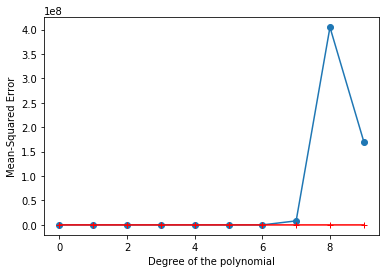

In [68]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data_2 = np.load('data_poly2.npz')
X2 = data_2['x']
Y2 = data_2['y']

deg_2 = np.arange(0,10,1)
mse_test = []
for i in range(len(deg)):
    pol = PolynomialFeatures(degree = deg_2[i])
    X_new = pol.fit_transform(X)
    X_new_2 = pol.fit_transform(X2.reshape(-1,1))
    lr = LinearRegression()
    fit = lr.fit(X_new, Y)
    mse_test.append(mean_squared_error(Y2, lr.predict(X_new_2)))
    
mse = np.array(mse_test)
print("The MSE values are: \n", mse_test)
plt.plot(deg_2, mse_test, marker = 'o')
plt.plot(deg_2, mse_train, marker = '+', color = 'red')
plt.xlabel('Degree of the polynomial')
plt.ylabel('Mean-Squared Error')